In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import glob

read files

In [3]:
web_pages_dir = '../../personalisation_project/TVNZ/*/*'
files = glob.glob(web_pages_dir)

scraping

In [4]:
def fetch_meta(soup):
    image = soup.select_one('.Hero-image-inner img').attrs['src'].strip()
    content_container = soup.select_one('.Hero-container-content-inner')
    title = content_container.select_one('.Hero-title a').text.strip()
    description = content_container.select_one('.Hero-description').text.strip()

    return {
        'episode_id': -1,
        'title': title,
        'rating': '',
        'description': description,
        'image_url': image,
        'is_season': 0,
        'season': -1
    }


def fetch_episodes(soup, unique_id, category, fallback_url):
    episodes = soup.select('.Episodes-list .Grid')

    data = []

    for idx in range(len(episodes)):
        ep_id = idx+1
        episode = episodes[idx]
        image_dump = ''
        try:
            image_dump = episode.select_one('img').attrs['src'].strip()
        except:
            image_dump = fallback_url

        title = episode.select_one('.Episode-title-label').text.strip()

        season_num = 1
        if 'season' in title.lower():
            season_num = title.split(',')[0].split(' ')[-1]

        description_container = episode.select_one('.Episode-description')
        rating = description_container.select_one('.Episode-rating').text.strip()
        description = description_container.text.strip()
        description = description[len(rating):].strip()

        data.append({
            'episode_id': ep_id,
            'title':title,
            'rating': rating,
            'description': description,
            'image_url': image_dump,
            'is_season': 1,
            'season': season_num,
            'category': category,
            'tv_program_id': unique_id
        })

    return data



In [5]:
%%time

tvprogram_data = []
# unique_id = 1

for idx in range(len(files)):
    unique_id = idx
    file = files[idx]
    splitted = file.split('/')
    category = splitted[4]
    file_path = '/'.join(splitted[4:])

    # if 'preschool/ready-steady-wiggle.html' != file_path:
    #     continue

    print(file_path)

    soup = BeautifulSoup(open(file), 'html.parser')

    content = fetch_meta(soup)
    content['tv_program_id'] = unique_id
    content['category'] = category
    content['file_name'] = file_path

    episodes = fetch_episodes(soup, unique_id, category, content['image_url'])

    tvprogram_data.append(content)

    for episode in episodes:
        tvprogram_data.append(episode)


documentary/proof.html
documentary/the-little-master.html
documentary/8-days-to-the-moon-and-back.html
documentary/millennium-teens.html
documentary/zulu-summer.html
documentary/the-mating-game.html
documentary/dahmer-on-dahmer-a-serial-killer-speaks.html
documentary/the-polar-bear-cub.html
documentary/69-the-saga-of-danny-hernandez.html
documentary/16-acres.html
documentary/the-addiction-machine.html
documentary/the-life-and-trials-of-oscar-pistorius.html
documentary/inreallife.html
documentary/the-moo-man.html
documentary/the-s-word.html
documentary/masked-monkey.html
documentary/the-go-gos.html
documentary/greta-thunberg-a-year-to-change-the-world.html
documentary/edward-viii-the-king-who-threw-away-his-crown.html
documentary/viewer-direction-advised.html
documentary/the-green-planet.html
documentary/agnetha-abba-and-after.html
documentary/mack-wrestles.html
documentary/shark-alarm-the-year-of-swimming-dangerously.html
documentary/david-bowie-the-last-five-years.html
documentary/the

In [6]:
df_tv_programs = pd.DataFrame(tvprogram_data)
df_tv_programs.head()

,episode_id,title,rating,description,image_url,is_season,season,tv_program_id,category,file_name
0,-1,Proof,,"Award-winning journalist, Guyon Espiner, inves...",https://play-images-prod-ctf.tech.tvnz.co.nz/a...,0,-1,0,documentary,documentary/proof.html
1,1,Proof,ML,Award-winning journalist Guyon Espiner looks i...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEASAB...",1,1,0,documentary,NaN
2,-1,The Little Master,,"For two decades, International Cricket star Sa...",https://play-images-prod-ctf.tech.tvnz.co.nz/a...,0,-1,1,documentary,documentary/the-little-master.html
3,1,The Little Master,G,"For two decades, International Cricket star Sa...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",1,1,1,documentary,NaN
4,-1,8 Days: To the Moon and Back,,Live the journey that changed the way we think...,https://play-images-prod-ctf.tech.tvnz.co.nz/a...,0,-1,2,documentary,documentary/8-days-to-the-moon-and-back.html


store dataset

In [7]:
df_tv_programs = df_tv_programs[['tv_program_id', 'title', 'rating', 'description', 'is_season', 'season', 'episode_id', 'category', 'image_url', 'file_name']]

In [11]:
df_tv_programs.head()

,tv_program_id,title,rating,description,is_season,season,episode_id,category,image_url,file_name
0,0,Proof,,"Award-winning journalist, Guyon Espiner, inves...",0,-1,-1,documentary,https://play-images-prod-ctf.tech.tvnz.co.nz/a...,documentary/proof.html
1,0,Proof,ML,Award-winning journalist Guyon Espiner looks i...,1,1,1,documentary,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEASAB...",NaN
2,1,The Little Master,,"For two decades, International Cricket star Sa...",0,-1,-1,documentary,https://play-images-prod-ctf.tech.tvnz.co.nz/a...,documentary/the-little-master.html
3,1,The Little Master,G,"For two decades, International Cricket star Sa...",1,1,1,documentary,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",NaN
4,2,8 Days: To the Moon and Back,,Live the journey that changed the way we think...,0,-1,-1,documentary,https://play-images-prod-ctf.tech.tvnz.co.nz/a...,documentary/8-days-to-the-moon-and-back.html


In [12]:
df_tv_programs.to_csv('../data/tv_programs_and_episodes.csv', index=False)

In [13]:
df_tv_programs = pd.read_csv('../data/tv_programs_and_episodes.csv')
df_tv_programs.head(10)

,tv_program_id,title,rating,description,is_season,season,episode_id,category,image_url,file_name
0,0,Proof,NaN,"Award-winning journalist, Guyon Espiner, inves...",0,-1,-1,documentary,https://play-images-prod-ctf.tech.tvnz.co.nz/a...,documentary/proof.html
1,0,Proof,ML,Award-winning journalist Guyon Espiner looks i...,1,1,1,documentary,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEASAB...",NaN
2,1,The Little Master,NaN,"For two decades, International Cricket star Sa...",0,-1,-1,documentary,https://play-images-prod-ctf.tech.tvnz.co.nz/a...,documentary/the-little-master.html
3,1,The Little Master,G,"For two decades, International Cricket star Sa...",1,1,1,documentary,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",NaN
4,2,8 Days: To the Moon and Back,NaN,Live the journey that changed the way we think...,0,-1,-1,documentary,https://play-images-prod-ctf.tech.tvnz.co.nz/a...,documentary/8-days-to-the-moon-and-back.html
5,2,"Season 1, Episode 1",PG,"Part 1 of 2: Using dramatic reconstruction, de...",1,1,1,documentary,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEASAB...",NaN
6,2,"Season 1, Episode 2",G,"Part 2 of 2: Using dramatic reconstruction, de...",1,1,2,documentary,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEASAB...",NaN
7,3,Millennium Teens,NaN,"In January 2000, seven babies were born into t...",0,-1,-1,documentary,https://play-images-prod-ctf.tech.tvnz.co.nz/a...,documentary/millennium-teens.html
8,3,Millennium Teens,PG,A social experiment documentary following 6 te...,1,1,1,documentary,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",NaN
9,4,Zulu Summer,NaN,After receiving a suspicious e-mail from an Af...,0,-1,-1,documentary,https://play-images-prod-ctf.tech.tvnz.co.nz/a...,documentary/zulu-summer.html


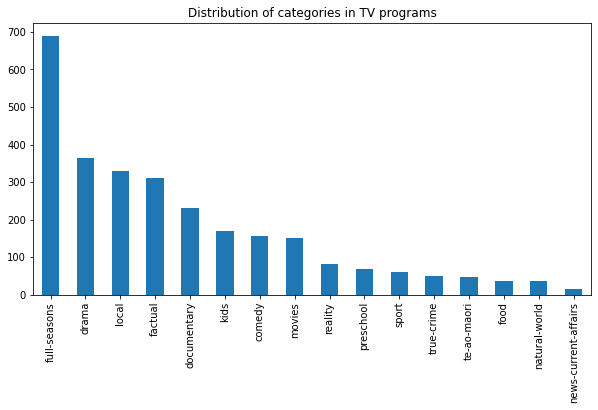

In [14]:
df_tv_programs[df_tv_programs.is_season == 0]['category'].value_counts().plot.bar(title='Distribution of categories in TV programs', figsize=(10, 5));

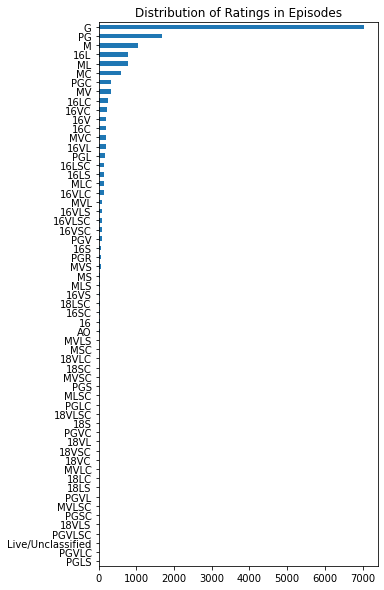

In [15]:
plot_ratings = df_tv_programs[df_tv_programs.is_season == 1]['rating'].value_counts().plot.barh(title='Distribution of Ratings in Episodes', figsize=(5, 10))

plot_ratings.invert_yaxis();

store a sample of the dataset for development and testing process, makes things faster

In [16]:
df_tv_programs[df_tv_programs.tv_program_id.isin([311, 401])].to_csv('../data/sample_tv_programs_and_episodes.csv', index=False)